In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [2]:
bank_data = pd.read_csv("bank-additional-full.csv", sep=";")
bank_data = bank_data.loc[:,['age','default','cons.price.idx','cons.conf.idx','y']]
bank_data.head(5)

,age,default,cons.price.idx,cons.conf.idx,y
0,56,no,93.994,-36.4,no
1,57,unknown,93.994,-36.4,no
2,37,no,93.994,-36.4,no
3,40,no,93.994,-36.4,no
4,56,no,93.994,-36.4,no


**Preprocessing Data for Random Forests**

In [3]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

**Splitting the Data**

In [4]:
# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Fitting and Evaluating the Model**

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8858946346200534


**Visualizing the Results**

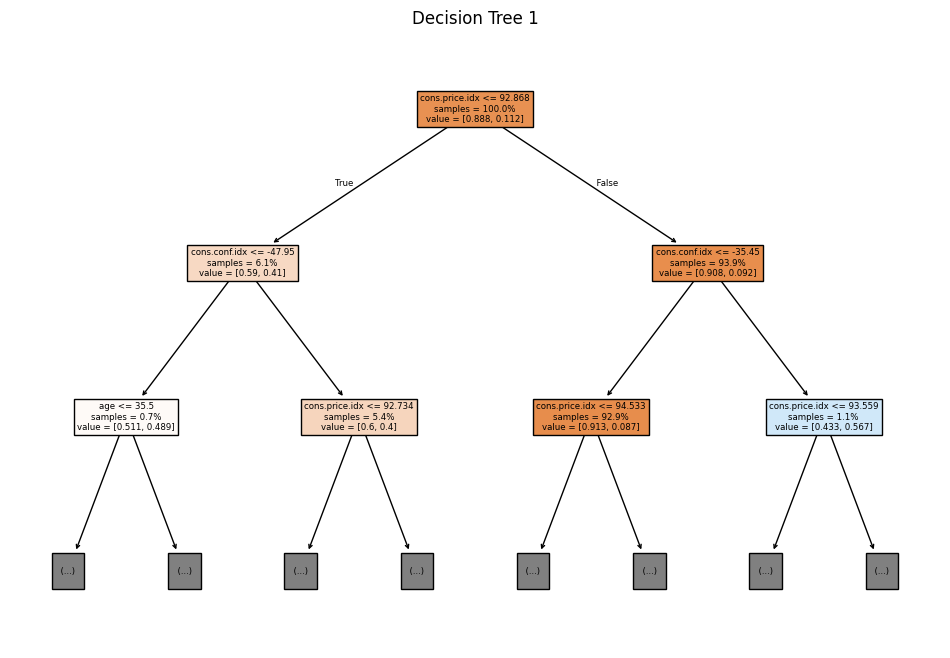

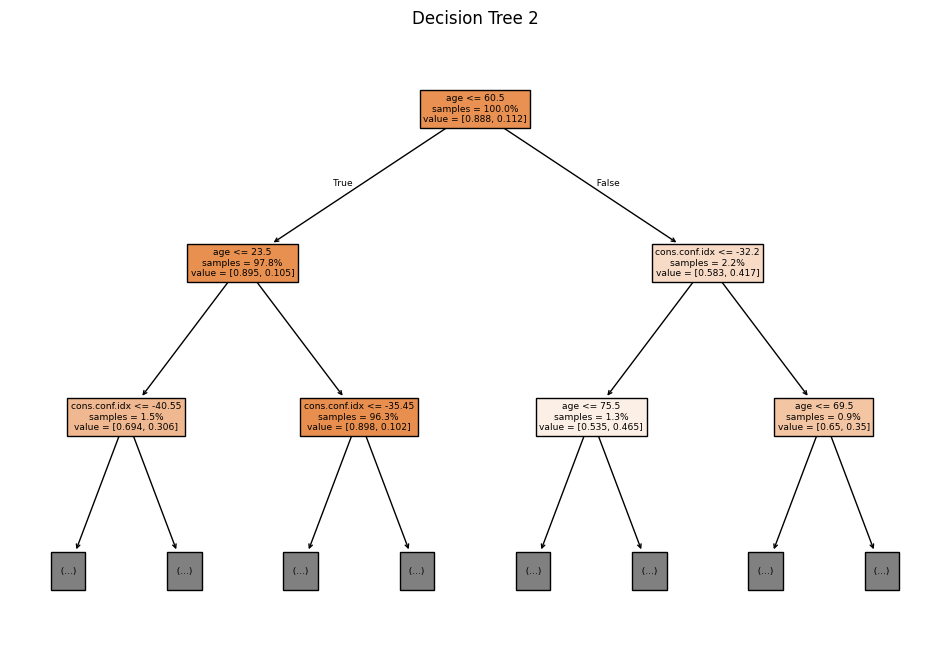

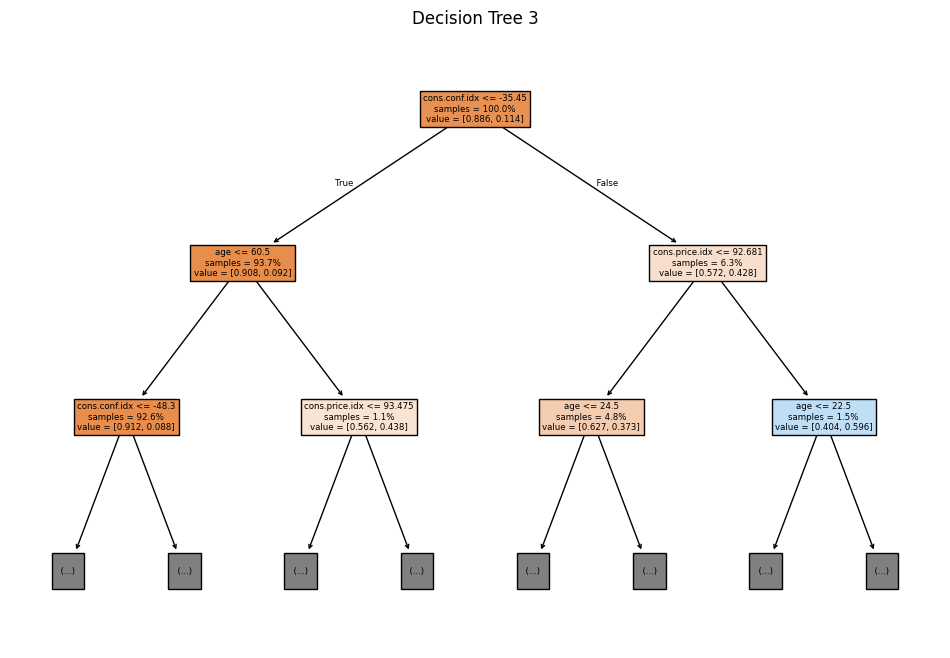

In [6]:
# Export the first three decision trees from the forest

 
# Export the first three decision trees from the forest
for i in range(3):
    tree = rf.estimators_[i]
    plt.figure(figsize=(12, 8))  # Set figure size
    plot_tree(tree, 
              feature_names=X_train.columns, 
              filled=True, 
              max_depth=2,  # Set maximum depth for visualization
              proportion=True, 
              impurity=False)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

**Hyperparameter Tuning**

In [7]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 127}


**More Evaluation Metrics**

Accuracy: 0.8891721291575625
Precision: 0.5099337748344371
Recall: 0.16757344940152338


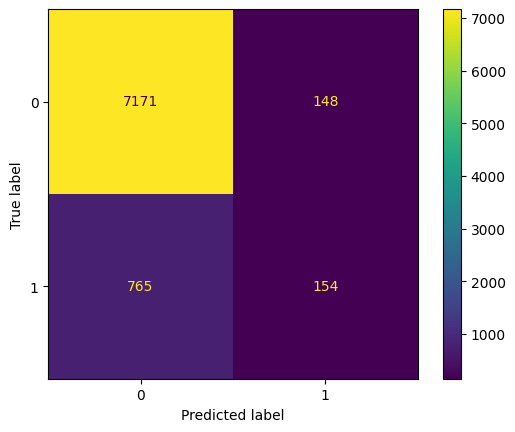

In [8]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

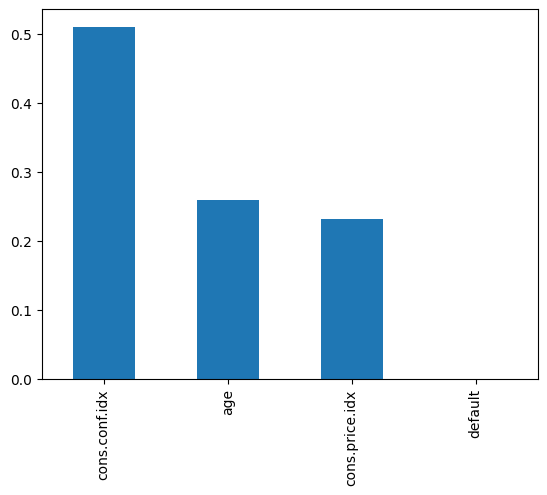

In [9]:
# Create a series contain feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();